In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("data\\encoded.csv")

C:\Users\acer\AppData\Local\Temp\ipykernel_17700\2697375578.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data\\encoded.csv")


In [18]:
df

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Furnishing,Society,Bathroom,...,Parking_Not Available,Parking_Open,Face_North,Face_North - East,Face_North - West,Face_Not Informed,Face_South,Face_South - East,Face_South -West,Face_West
0,0,0,0,0,0,0,1,2,Crystal Spires,3,...,True,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,1,0,2,Gokul Sangeet,4,...,True,False,False,False,True,False,False,False,False,False
2,0,0,0,0,0,1,0,1,Oasis,4,...,False,False,True,False,False,False,False,False,False,False
3,0,0,0,0,0,1,1,2,N\A,3,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,1,1,0,Orchid Park,3,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42316,1,0,0,1,1,1,1,2,Peer Muchalla Apartments RWF,3,...,True,False,False,True,False,False,False,False,False,False
42317,1,0,0,1,1,1,1,1,Bollywood Esencia,3,...,False,False,False,False,False,False,False,False,False,False
42318,1,0,0,1,1,1,1,2,Sushma Urban Views,3,...,False,False,False,True,False,False,False,False,False,False
42319,1,0,0,1,1,1,1,0,Bollywood Esencia,3,...,False,False,False,False,False,False,False,False,False,False


In [70]:
# Select all object-type columns
object_cols = df.select_dtypes(include='object')

# Display info about object-type columns
if not object_cols.empty:
    object_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42321 entries, 0 to 42320
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Society    42321 non-null  object
 1   Ownership  42321 non-null  object
dtypes: object(2)
memory usage: 661.4+ KB


In [29]:
df['Bathroom'].value_counts()

Bathroom
2     19552
3     16917
4      4374
5      1084
1       216
6       132
10       19
7        15
8         6
9         6
Name: count, dtype: int64

In [21]:
df['Bathroom'] = df['Bathroom'].replace("N\A",df['Bathroom'].mode()[0])

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\acer\AppData\Local\Temp\ipykernel_17700\3063423926.py:1: SyntaxWarning: invalid escape sequence '\A'
  df['Bathroom'] = df['Bathroom'].replace("N\A",df['Bathroom'].mode()[0])


In [22]:
df['Bathroom'] = df['Bathroom'].replace("> 10","10")

In [27]:
df['Bathroom'] = pd.to_numeric(df['Bathroom'])

In [52]:
df['Balcony'].value_counts()

Balcony
2     13773
0      8596
3      8324
1      7879
4      2986
5       628
6       101
10       12
7        11
8        10
9         1
Name: count, dtype: int64

In [51]:
df["Balcony"] = df['Balcony'].replace("6",6)

C:\Users\acer\AppData\Local\Temp\ipykernel_17700\1295068775.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Balcony"] = df['Balcony'].replace("6",6)


In [69]:
df['BHK'].value_counts()

BHK
3     24203
2     12358
4      5186
5       426
6        56
1        50
10       20
7        11
9         6
8         5
Name: count, dtype: int64

In [55]:
df['BHK'] = df['BHK'].replace("Unknown",df['BHK'].mode()[0])

In [68]:
df['BHK'] = df['BHK'].replace("8.0",8)

C:\Users\acer\AppData\Local\Temp\ipykernel_17700\1863672673.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BHK'] = df['BHK'].replace("8.0",8)


In [71]:
df["Ownership"].value_counts()

Ownership
Freehold                26623
N\A                     12003
Leasehold                2394
Co-operative Society     1039
Power Of Attorney         262
Name: count, dtype: int64

<Axes: xlabel='Ownership', ylabel='SalePrice(in Lakhs)'>

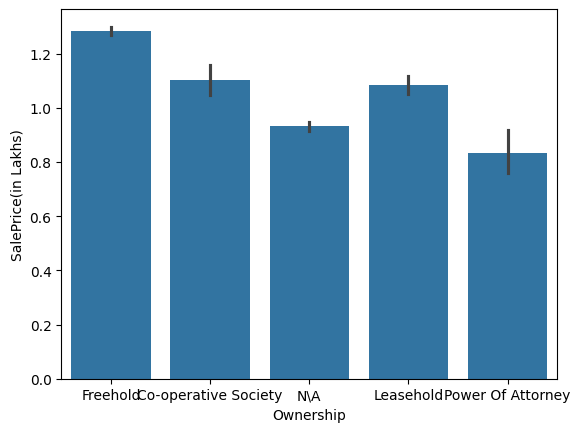

In [72]:
import seaborn as sns
sns.barplot(x=df['Ownership'], y=df['SalePrice(in Lakhs)'])

In [73]:
ownership_encoded = pd.get_dummies(df['Ownership'], prefix='Ownership', drop_first=False)

In [74]:
df = pd.concat([df, ownership_encoded], axis=1)

In [75]:
df

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Furnishing,Society,Bathroom,...,Face_Not Informed,Face_South,Face_South - East,Face_South -West,Face_West,Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_N\A,Ownership_Power Of Attorney
0,0,0,0,0,0,0,1,2,Crystal Spires,3,...,False,False,False,False,False,False,True,False,False,False
1,0,0,0,0,0,1,0,2,Gokul Sangeet,4,...,False,False,False,False,False,True,False,False,False,False
2,0,0,0,0,0,1,0,1,Oasis,4,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0,0,0,1,1,2,N\A,3,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0,0,1,1,0,Orchid Park,3,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42316,1,0,0,1,1,1,1,2,Peer Muchalla Apartments RWF,3,...,False,False,False,False,False,False,True,False,False,False
42317,1,0,0,1,1,1,1,1,Bollywood Esencia,3,...,False,False,False,False,False,False,True,False,False,False
42318,1,0,0,1,1,1,1,2,Sushma Urban Views,3,...,False,False,False,False,False,False,False,False,True,False
42319,1,0,0,1,1,1,1,0,Bollywood Esencia,3,...,False,False,False,False,False,False,True,False,False,False


In [77]:
df.drop(columns=['Society'], inplace=True)

In [ ]:
df

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Furnishing,Bathroom,Balcony,...,Face_Not Informed,Face_South,Face_South - East,Face_South -West,Face_West,Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_N\A,Ownership_Power Of Attorney
0,0,0,0,0,0,0,1,2,3,0,...,False,False,False,False,False,False,True,False,False,False
1,0,0,0,0,0,1,0,2,4,3,...,False,False,False,False,False,True,False,False,False,False
2,0,0,0,0,0,1,0,1,4,0,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0,0,0,1,1,2,3,1,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0,0,1,1,0,3,1,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42316,1,0,0,1,1,1,1,2,3,2,...,False,False,False,False,False,False,True,False,False,False
42317,1,0,0,1,1,1,1,1,3,3,...,False,False,False,False,False,False,True,False,False,False
42318,1,0,0,1,1,1,1,2,3,0,...,False,False,False,False,False,False,False,False,True,False
42319,1,0,0,1,1,1,1,0,3,2,...,False,False,False,False,False,False,True,False,False,False


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42321 entries, 0 to 42320
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Location_0                      42321 non-null  int64  
 1   Location_1                      42321 non-null  int64  
 2   Location_2                      42321 non-null  int64  
 3   Location_3                      42321 non-null  int64  
 4   Location_4                      42321 non-null  int64  
 5   Location_5                      42321 non-null  int64  
 6   Location_6                      42321 non-null  int64  
 7   Furnishing                      42321 non-null  int64  
 8   Bathroom                        42321 non-null  int64  
 9   Balcony                         42321 non-null  int64  
 10  Ownership                       42321 non-null  object 
 11  Area(in sqft)                   42321 non-null  float64
 12  BHK                             

In [85]:
bool_columns = df.select_dtypes(include='bool').columns


In [86]:
bool_columns

Index([], dtype='object')

In [83]:
# Convert all boolean columns to integers (0 and 1)
df[bool_columns] = df[bool_columns].astype(int)

In [87]:
df = df.drop(columns=["Ownership"])


In [88]:
df

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Furnishing,Bathroom,Balcony,...,Face_Not Informed,Face_South,Face_South - East,Face_South -West,Face_West,Ownership_Co-operative Society,Ownership_Freehold,Ownership_Leasehold,Ownership_N\A,Ownership_Power Of Attorney
0,0,0,0,0,0,0,1,2,3,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,2,4,3,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,1,4,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,1,2,3,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,1,0,3,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42316,1,0,0,1,1,1,1,2,3,2,...,0,0,0,0,0,0,1,0,0,0
42317,1,0,0,1,1,1,1,1,3,3,...,0,0,0,0,0,0,1,0,0,0
42318,1,0,0,1,1,1,1,2,3,0,...,0,0,0,0,0,0,0,0,1,0
42319,1,0,0,1,1,1,1,0,3,2,...,0,0,0,0,0,0,1,0,0,0


In [89]:
print(df.dtypes)


Location_0                          int64
Location_1                          int64
Location_2                          int64
Location_3                          int64
Location_4                          int64
Location_5                          int64
Location_6                          int64
Furnishing                          int64
Bathroom                            int64
Balcony                             int64
Area(in sqft)                     float64
BHK                                 int64
FlatFloor                         float64
TotalFloors                       float64
Basement                            int64
Main Road                           int64
Garden/Park                         int64
Pool                                int64
ParkingNumbers                      int64
SalePrice(in Lakhs)               float64
Transaction_Other                   int64
Transaction_Rent/Lease              int64
Transaction_Resale                  int64
Transaction_Unknown               

In [90]:
X = df.drop(columns=["SalePrice(in Lakhs)"])  # Drop target column
y = df["SalePrice(in Lakhs)"]  # Target column


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()

In [94]:
model.fit(X_train,y_train)

LinearRegression()

In [96]:
y_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import r2_score

In [98]:
r2_score(y_test,y_pred)

0.6331952085484334

In [99]:
df.to_csv("D:\Data Science\Projects\FlatPricePrediction\data\encoded.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\acer\AppData\Local\Temp\ipykernel_17700\3459608927.py:1: SyntaxWarning: invalid escape sequence '\D'
  df.to_csv("D:\Data Science\Projects\FlatPricePrediction\data\encoded.csv", index=False)
